## The wine dataset

load the wine dataset

In [17]:
import pandas as pd
import numpy as np

In [18]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']


In [19]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.1, 
                     random_state=0, 
                     stratify=y)

Part 1: Random forest estimators

In [20]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import time

In [21]:
n_range = [1,5,25,100,500,1000]
cv_scores = []
time_it = []
for n in n_range:
    start = time.time()
    forest = RandomForestClassifier(criterion='gini',
                                    n_estimators=n, 
                                    random_state=1,
                                    n_jobs=2)
    
    scores = cross_val_score(estimator=forest,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
    end = time.time()
    
    cv_scores.append(scores)
    time_it.append(end-start)

In [22]:
print(cv_scores)

[array([0.83333333, 1.        , 0.83333333, 0.875     , 0.93333333,
       0.86666667, 0.93333333, 1.        , 0.8       , 0.93333333]), array([0.88888889, 1.        , 0.94444444, 0.9375    , 1.        ,
       1.        , 1.        , 1.        , 0.86666667, 0.93333333]), array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.93333333, 0.93333333, 0.93333333, 0.93333333]), array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.93333333, 0.93333333, 0.93333333, 0.93333333]), array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.93333333, 0.93333333, 0.93333333, 0.93333333]), array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.93333333, 0.93333333, 0.93333333, 0.93333333])]


In [23]:
print(time_it)

[1.0761773586273193, 2.153270959854126, 2.314589738845825, 3.118366003036499, 10.175261974334717, 18.144625902175903]


part 2: Random forest feature importance

 1) Color intensity                0.182460
 2) Flavanoids                     0.172491
 3) Proline                        0.148206
 4) Alcohol                        0.128809
 5) OD280/OD315 of diluted wines   0.097589
 6) Hue                            0.077128
 7) Total phenols                  0.057665
 8) Alcalinity of ash              0.030806
 9) Magnesium                      0.030222
10) Malic acid                     0.029085
11) Nonflavanoid phenols           0.022318
12) Proanthocyanins                0.012046
13) Ash                            0.011175


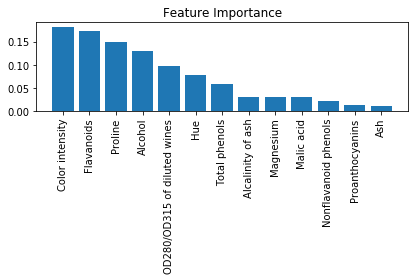

In [27]:
import matplotlib.pyplot as plt
feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=25,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [31]:
print("My name is Jingyi Wang")
print("My NetID is: jingyiw9")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Jingyi Wang
My NetID is: jingyiw9
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
